In [1]:
import torch.nn as nn
import torch.optim as optim
import logging

In [2]:
tuning_type='optimizer_name'
learning_rate=0.5
reduceLR_factor=0.1
reduceLR_patience=5

weight_decay_rate=0.01
batchSize=128
optimizer_name='SGD'

In [3]:
tuning_type='q1_untuned'
learning_rate=0.5
reduceLR_factor=0
reduceLR_patience=100

weight_decay_rate=0
batchSize=64
optimizer_name='SGD'

In [4]:
# editable parameters
quesname='q1/'
savename='q1/'
num_epochs = 10

criterion = nn.CrossEntropyLoss()


def loginfo(converged=False,testnum=1):     
    
    
    logging.basicConfig(filename=tuning_type+'.log', level=logging.INFO, format='%(message)s')
    logging.info(f"tuning : {tuning_type}")
    if tuning_type=="LR":
        logging.info(  f"Accuracy: {accuracy:.2f}% |  {num_epochs} epochs | initial learning rate : {learning_rate:.2f}  | LR factor {reduceLR_factor} | Patience {reduceLR_patience}")
    else:
        logging.info(  f"Accuracy: {accuracy:.2f}% | epochs: {num_epochs} | initial learning rate: {learning_rate:.2f} | LR factor: {reduceLR_factor} | Patience: {reduceLR_patience} | weight decay rate: {weight_decay_rate} | Batchsize: {batchSize} | optimizer: {optimizer_name} | training time: {round(training_time,1)} sec\n")
    

In [5]:
# Initialisation
import numpy as np
import math
import torch as t
import torch 
import os

log_dir = '../../log'
os.makedirs(log_dir, exist_ok=True)

log_dir=os.path.join(log_dir, quesname)
os.makedirs(log_dir, exist_ok=True)
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

import matplotlib.pyplot as plt
%matplotlib inline


# logging.basicConfig(filename=logfile, level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')



In [6]:

# part 1 and 2:
# dataset loading:
training_data = datasets.FashionMNIST(
    root="../../data/",
    train=True,
    download=True,
    transform=ToTensor() # Normalisation step
    
)

# note that ToTensor not just converts the image into a tensor but also normalises its intensity in range 0 to 1


test_data = datasets.FashionMNIST(
    root="../../data/",
    train=False,
    download=True,
    transform=ToTensor() # Normalisation step
)

# Create data loaders for training and testing


train_loader = DataLoader(training_data, batch_size=batchSize, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batchSize, shuffle=False)

In [7]:

# visualising features of dataset
# Assuming you have already defined train_loader or test_loader

# Iterate through the DataLoader
for batch in train_loader:  # You can also use test_loader if needed
    # Each batch is a tuple with two elements:
    # - batch[0]: Contains the input data (e.g., images)
    # - batch[1]: Contains the corresponding labels

    input_data, labels = batch

    # Now, you can access individual values in the batch
    # Let's say you want to access the first image and label in the batch
    d={}
    for i in range(0,16):
        first_image = input_data[i]
        first_label = labels[i]

        # You can print or manipulate the individual values as needed
        print("First Image Shape:", first_image.shape)
        # print("First Image data:", first_image[0][0])
        print("First Label:", first_label)

    # You can also access other images and labels in the batch in a similar manner
    # For example, to access the second image and label, you can use input_data[1] and labels[1]

    # Break the loop if you only want to see the values in the first batch
    break


First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(2)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(7)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(8)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(6)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(6)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(3)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(9)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(0)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(3)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(6)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(1)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(3)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(2)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(6)
First Image Shape: torch.Size([1, 28, 28])
First Label: tensor(5)
First Imag

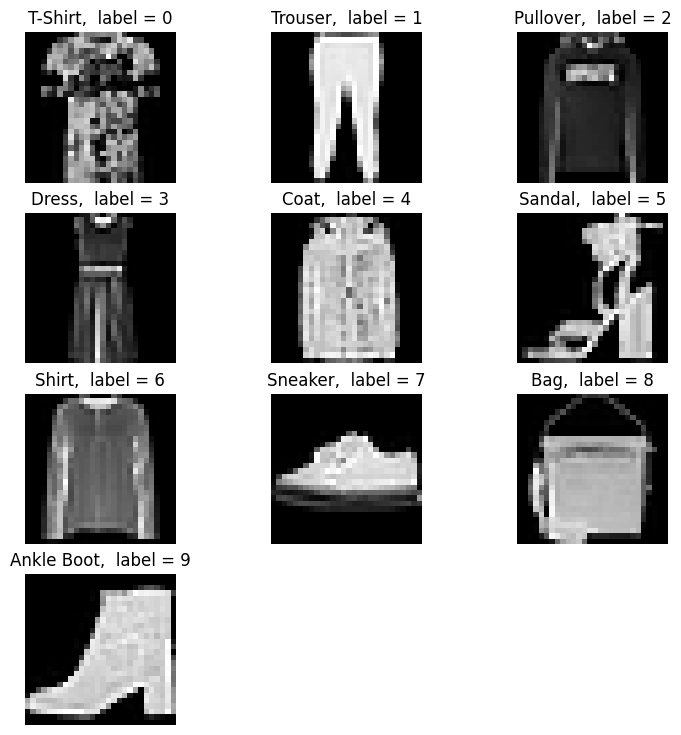

In [8]:
# plotting one example of each label
selected_labels = {}  # Keep track of selected labels
rows=4
cols=3

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(9, 9))
while len(selected_labels) < 10:
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    if label not in selected_labels:
        selected_labels[label]=sample_idx
        


for label in range(0,10):    
    img, label = training_data[selected_labels[label]]
    figure.add_subplot(rows, cols, label+1)
    plt.title(labels_map[label] + f",  label = {label}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [9]:
# part 3:



# builtin classifier:

# Define the model

# model saving
# Define a directory to save models
save_dir = '../../saved_models/'
save_dir=os.path.join(save_dir, savename)

os.makedirs(save_dir, exist_ok=True)

model = nn.Sequential(

    # we need to flatten the input data from 2d tensor into 1d tensor of 784 values (28*28) since data is in form of images
    nn.Flatten(),  # Flatten the input data

    nn.Linear(in_features=784, out_features=10),  # Linear layer   
    # nn.Linear(in_features=784, out_features=batchSize),  # Linear layer   

    nn.BatchNorm1d(10),
    # this normalsises input tensors by scaling and shifting
    # makes mean 0 and variance 1

    # softmax function, or normalized exponential function converts a vector of K real numbers into a probability distribution of K possible outcomes
    nn.Softmax(dim=1)  # Softmax activation

    
)

# Specify the path to the saved checkpoint file
# model_path = '../../saved_models/model_checkpoint.pth'

# tk
model_path = os.path.join(save_dir, 'ignore.pth')

# model_path = os.path.join(save_dir, 'model_checkpoint.pth')

# Check if the file exists before loading
if os.path.exists(model_path):
    # Load the model checkpoint
    checkpoint = torch.load(model_path)

    # Load the model's state_dict
    model.load_state_dict(checkpoint)
    print("Model loaded successfully.")
else:
    print(f"Checkpoint file '{model_path}' not found. Model not loaded.")


print('model created')

Checkpoint file '../../saved_models/q1/ignore.pth' not found. Model not loaded.
model created


In [10]:
print("Model structure before training: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure before training:  Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Softmax(dim=1)
) 


Layer: 1.weight | Size: torch.Size([10, 784]) | Values : tensor([[ 0.0255,  0.0274, -0.0009,  ...,  0.0234, -0.0249,  0.0297],
        [ 0.0224, -0.0334, -0.0179,  ...,  0.0062,  0.0122, -0.0164]],
       grad_fn=<SliceBackward0>) 

Layer: 1.bias | Size: torch.Size([10]) | Values : tensor([0.0309, 0.0084], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([10]) | Values : tensor([1., 1.], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([10]) | Values : tensor([0., 0.], grad_fn=<SliceBackward0>) 



In [11]:

# Define the optimizer based on the provided name, learning rate, and weight decay rate
if optimizer_name == "SGD":
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay_rate)
elif optimizer_name == "Adam":
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay_rate)
elif optimizer_name == "RMSprop":
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay_rate)
else:
    raise ValueError("Invalid optimizer name")


In [12]:
# part 4:

# Define the loss function


# import torch.optim as optim
# Define the optimizer (e.g., SGD)



# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

'''
about SGD: Stochastic Gradient Descent:
basically it performs seqeuntial updation of paramters after each epoch, using formula :
parameter = parameter - learning_rate * gradient

'''
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=reduceLR_factor, patience=reduceLR_patience, verbose=True)

'''
here mode = min : means reduce (instead of increase) LR when error plateaus

patience = how many epochs to wait before reducing LR
'''

print('part 4 done')



part 4 done


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1/10] - Loss: 1.6992, Learning Rate: 0.500000
Epoch [2/10] - Loss: 1.6461, Learning Rate: 0.500000
Epoch [3/10] - Loss: 1.6370, Learning Rate: 0.500000
Epoch [4/10] - Loss: 1.6312, Learning Rate: 0.500000
Epoch [5/10] - Loss: 1.6266, Learning Rate: 0.500000
Epoch [6/10] - Loss: 1.6229, Learning Rate: 0.500000
Epoch [7/10] - Loss: 1.6216, Learning Rate: 0.500000
Epoch [8/10] - Loss: 1.6186, Learning Rate: 0.500000
Epoch [9/10] - Loss: 1.6173, Learning Rate: 0.500000
Epoch [10/10] - Loss: 1.6163, Learning Rate: 0.500000
Training complete
time taken to train :  16.016474962234497
time per epoch :  1.6


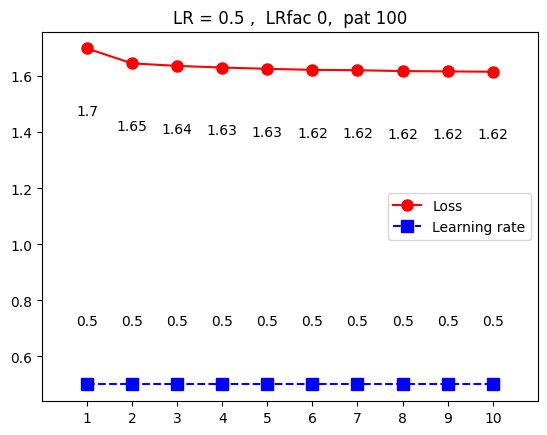

In [13]:
# part 5
# Define the number of training epochs


import time
t1=time.time()
# Training loop
fig, ax1 = plt.subplots()
# running_loss_data=[]
converged=False
avg_loss_data=[]
LR_data=[]
epoch_data=[]
# plt.ion()
# epoch_data=np.arange(1, num_epochs+1)
# num_epochs=10
plt.title(f'LR = {learning_rate} ,  LRfac {reduceLR_factor},  pat {reduceLR_patience}')
# plt.xlim(0, num_epochs+1)

plt.legend()
try:
    
    for epoch in range(num_epochs):
        # Set the model in training mode
        model.train()
        
        running_loss = 0.0
        
        # Iterate over the training dataset
        for inputs, labels in train_loader:  # Replace train_loader with your data loader
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute the loss
            loss = criterion(outputs, labels)
            
            # Backpropagation
            loss.backward()
            
            # Update the model's parameters
            optimizer.step()
            
            # Track the running loss
            running_loss += loss.item()
        
        # Calculate and print the average loss for this epoch
        average_loss = running_loss / len(train_loader)



        current_lr = optimizer.param_groups[0]['lr']
        
        # running_loss_data.append(running_loss)
        avg_loss_data.append(average_loss)
        epoch_data.append(epoch+1)
        LR_data.append(current_lr)

        # ax1.clear()
    
        # Plot the data for this epoch
        # ax1.plot(epoch_data, avg_loss_data, label='Average Loss', color='blue')
        # ax1.set_xlabel('Epoch')
        # ax1.set_ylabel('Average Loss', color='blue')
        
        # ax2 = ax1.twinx()
        # ax2.plot(epoch_data, LR_data, label='Learning Rate', color='red')
        # ax2.set_ylabel('Learning Rate', color='red')
        
        # # Display the updated plot for this epoch
        # plt.draw()
        # plt.pause(0.01)  # Adjust the pause duration as needed
        
        

        # Update the learning rate scheduler with the training loss
        scheduler.step(average_loss)
        
        # ax1.xticks(epoch_data,epoch_data)
        # i=epoch
        # ax1.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],2)}', ha='center', va='top')

        # ax1.clear()
    
        # # Plot the data for this epoch
        # ax1.plot(epoch_data, avg_loss_data, label='Average Loss', color='blue')
        # ax1.set_xlabel('Epoch')
        # ax1.set_ylabel('Average Loss', color='blue')
        
        # ax2 = ax1.twinx()
        # ax2.plot(epoch_data, LR_data, label='Learning Rate', color='red')
        # ax2.set_ylabel('Learning Rate', color='red')
        
        # # Display the updated plot for this epoch
        # plt.draw()
        # plt.pause(0.01)

        # plt.clear()
        # plt.xticks(epoch_data,epoch_data)
        # plt.title(f'LR = {learning_rate} ,  LRfac {reduceLR_factor},  pat {reduceLR_patience}')
        # plt.plot(epoch_data,avg_loss_data, marker='o', linestyle='-', markersize=8, label='Loss', color='red')
        # plt.plot(epoch_data,LR_data,  marker='s', linestyle='--', markersize=8, label='Learning rate', color='blue')
        # plt.xticks(epoch_data,epoch_data)
        # # i=epoch

        # for i in range(0,epoch+1):
        #     plt.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],5)}', ha='center', va='top')
            
        #     plt.text(epoch_data[i], LR_data[i]+0.2, f'{LR_data[i]}', ha='center', va='bottom')
        # plt.show()
        # plt.draw()
        # plt.pause(0.001)
        
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {average_loss:.4f}, Learning Rate: {current_lr:.6f}")
        if current_lr==0:
            converged=True
            print("training stopping")
            num_epochs=epoch+1
            raise KeyboardInterrupt

        
        # print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {average_loss:.4f}")
        
except KeyboardInterrupt:
    print("\n ---------training interrupted----------- \n")


# plt.ioff()
# plt.show()


print("Training complete")
t2=time.time()
training_time=t2-t1
print('time taken to train : ',training_time)
print('time per epoch : ',round(training_time/num_epochs,2))

# pltfolder=f"{learning_rate}|{num_epochs}|{reduceLR_factor}|{reduceLR_patience}"

# Add labels for each data point (y-values)
for i in range(num_epochs):
    plt.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],2)}', ha='center', va='top')
    plt.text(epoch_data[i], LR_data[i]+0.2, f'{LR_data[i]}', ha='center', va='bottom')
epoch_data=np.arange(1, num_epochs+1)
plt.plot(epoch_data,avg_loss_data, marker='o', linestyle='-', markersize=8, label='Loss', color='red')
plt.plot(epoch_data,LR_data,  marker='s', linestyle='--', markersize=8, label='Learning rate', color='blue')
# plt.title(tunefilename)
plt.title(f'LR = {learning_rate} ,  LRfac {reduceLR_factor},  pat {reduceLR_patience}')
plt.xlim(0, num_epochs+1)
plt.xticks(epoch_data,epoch_data)

plt.legend()
plt.savefig('')

In [14]:
print("Model structure after training: ", model, "\n\n")
print("jere")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure after training:  Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Softmax(dim=1)
) 


jere
Layer: 1.weight | Size: torch.Size([10, 784]) | Values : tensor([[ 0.0248,  0.0276,  0.0040,  ..., -0.1061, -0.0966,  0.0274],
        [ 0.0225, -0.0334, -0.0178,  ..., -0.0130, -0.0036, -0.0215]],
       grad_fn=<SliceBackward0>) 

Layer: 1.bias | Size: torch.Size([10]) | Values : tensor([0.0309, 0.0084], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([10]) | Values : tensor([6.3707, 7.0420], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([10]) | Values : tensor([-0.1231,  0.6617], grad_fn=<SliceBackward0>) 



In [15]:
# part 6 :
# testing 

# Set the model to evaluation mode
model.eval()

correct_predictions = 0
total_predictions = 0

# Iterate over the testing dataset

k=0
for inputs, labels in test_loader:  # Use your test data loader
    k+=1
    # Forward pass to obtain predictions
    outputs = model(inputs)
    
    # Get the predicted class for each example in the batch
    _, predicted = torch.max(outputs, dim=1)
    
    # Count correct predictions in this batch
    batch_correct_predictions = (predicted == labels).sum().item()
    correct_predictions += batch_correct_predictions
    
    # Count total predictions in this batch

    batch_total_predictions = labels.size(0)
    total_predictions += batch_total_predictions 

    # Print the running accuracy for this batch
    # Update running accuracy
    batch_accuracy=batch_correct_predictions/batch_total_predictions * 100.0
    print(f"Accuracy on this batch {batch_accuracy:.2f}%")

    accuracy = (correct_predictions / total_predictions) * 100.0
    print(f"Accuracy till now:  testing dataset: {accuracy:.2f}%")

print()
print("number of tests:",k)

# Calculate the accuracy
accuracy = (correct_predictions / total_predictions) * 100.0
print(f"Accuracy on the testing dataset: {accuracy:.2f}%")
print('time taken to train : ',training_time)


# saving accuracy


  

# tk
# log_dir="../../log/"
# tunefilename=f'Accuracy {accuracy} ,pat{reduceLR_patience}, LRfac{reduceLR_factor},LR{learning_rate}'
# plot_dir=log_dir
# os.makedirs(plot_dir, exist_ok=True)
# logfilename=tunefilename+'.log'
# plotfilename=tunefilename+'.png'
# plotfilename=f'pat{reduceLR_patience}, LRfac{reduceLR_factor},LR{learning_rate}.png'
# plotfile=os.path.join(log_dir, plotfilename)
# logfile=os.path.join(log_dir, logfilename)


# tunefilename=f'patience={reduceLR_patience}_LR_factor={reduceLR_factor}'

import logging

# print(logfile)
print("final accuracy : ",accuracy,"%")
# logging.basicConfig(filename=f'{accuracy}.log', level=logging.INFO, format='%(message)s')
# logging.info(f"initial learning rate : {learning_rate:.2f} | Accuracy: {accuracy:.2f}% | {num_epochs} epochs | converged : {converged}\n")
# logging.info("ererer")
loginfo(accuracy)
logging.shutdown()



# plt.show()
# loginfo(converged,accuracy)
print("data saved")



Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 84.38%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 85.94%
Accuracy on this batch 89.06%
Accuracy till now:  testing dataset: 86.98%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 85.94%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 85.31%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 85.42%
Accuracy on this batch 89.06%
Accuracy till now:  testing dataset: 85.94%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 85.74%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 85.07%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 84.38%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 84.38%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 84.38%
Accuracy on this batch 89.06%
Accuracy till now:  testing dataset: 84.74%
Accuracy on this batch 87.50%
Accuracy

In [16]:
# loginfo(accuracy)
# logging.shutdown()
# logging.basicConfig(filename='new1'+'.log', level=logging.INFO, format='%(message)s')
# logging

# logging.info("hi")
# logging.info(f"tuning : {tuning_type}")
# logging.info(  f"Accuracy: {accuracy:.2f}% | epochs: {num_epochs} | initial learning rate: {learning_rate:.2f} | LR factor: {reduceLR_factor} | Patience: {reduceLR_patience} | weight decay rate: {weight_decay_rate} | Batchsize: {batchSize} | optimizer: {optimizer_name} | training time: {round(training_time,1)} sec\n")